In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import OneClassSVM
from numpy import where
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB

In [2]:
diabdata = pd.read_csv('diabetes_dataset__2019.csv')

In [3]:
diabdata.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [4]:
diabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [5]:
# Label Encoding
label_encode = LabelEncoder()
diabdata['Age'] = label_encode.fit_transform(diabdata['Age']).astype(float)
diabdata['PhysicallyActive'] = label_encode.fit_transform(diabdata['PhysicallyActive']).astype(float)
diabdata['JunkFood'] = label_encode.fit_transform(diabdata['JunkFood']).astype(float)
diabdata['Stress'] = label_encode.fit_transform(diabdata['Stress']).astype(float)
diabdata['BPLevel'] = label_encode.fit_transform(diabdata['BPLevel']).astype(float)
diabdata['UriationFreq'] = label_encode.fit_transform(diabdata['UriationFreq']).astype(float)
diabdata

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,1.0,Male,no,yes,3.0,39.0,no,no,8,6,no,1.0,2.0,2.0,0.0,0,0.0,no
1,1.0,Male,no,yes,0.0,28.0,no,no,8,6,yes,3.0,2.0,4.0,0.0,0,0.0,no
2,0.0,Male,no,no,3.0,24.0,no,no,6,6,no,1.0,2.0,4.0,0.0,0,0.0,no
3,1.0,Male,no,no,3.0,23.0,no,no,8,6,no,1.0,2.0,4.0,0.0,0,0.0,no
4,0.0,Male,no,no,0.0,27.0,no,no,8,8,no,1.0,2.0,4.0,0.0,0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,3.0,Male,yes,no,1.0,25.0,no,no,8,6,no,2.0,2.0,4.0,0.0,0,0.0,yes
948,2.0,Male,yes,yes,1.0,27.0,no,no,6,5,yes,1.0,2.0,2.0,0.0,0,1.0,yes
949,2.0,Male,no,yes,2.0,23.0,no,no,6,5,yes,1.0,2.0,2.0,0.0,0,0.0,no
950,2.0,Male,no,yes,0.0,27.0,no,yes,6,5,yes,1.0,3.0,2.0,0.0,0,0.0,no


In [6]:
diabdata_new = pd.get_dummies(diabdata, columns = ['Gender','Family_Diabetes', 'highBP', 'Smoking', 'Alcohol', 'RegularMedicine', 'Diabetic'])
diabdata_new = diabdata_new.drop(['highBP_no','Family_Diabetes_no', 'Smoking_no', 'Alcohol_no', 'Gender_Female', 'RegularMedicine_no', 'RegularMedicine_o', 'Diabetic_ no', 'Diabetic_no'], axis = 1)
diabdata_new['Gender_Male'] = diabdata_new['Gender_Male'].astype(float)
diabdata_new['Family_Diabetes_yes'] = diabdata_new['Family_Diabetes_yes'].astype(float)
diabdata_new['highBP_yes'] = diabdata_new['highBP_yes'].astype(float)
diabdata_new['Smoking_yes'] = diabdata_new['Smoking_yes'].astype(float)
diabdata_new['Alcohol_yes'] = diabdata_new['Alcohol_yes'].astype(float)
diabdata_new['RegularMedicine_yes'] = diabdata_new['RegularMedicine_yes'].astype(float)
diabdata_new

,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Gender_Male,Family_Diabetes_yes,highBP_yes,Smoking_yes,Alcohol_yes,RegularMedicine_yes,Diabetic_yes
0,1.0,3.0,39.0,8,6,1.0,2.0,2.0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1,1.0,0.0,28.0,8,6,3.0,2.0,4.0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
2,0.0,3.0,24.0,6,6,1.0,2.0,4.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,3.0,23.0,8,6,1.0,2.0,4.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,27.0,8,8,1.0,2.0,4.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,3.0,1.0,25.0,8,6,2.0,2.0,4.0,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
948,2.0,1.0,27.0,6,5,1.0,2.0,2.0,0.0,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1
949,2.0,2.0,23.0,6,5,1.0,2.0,2.0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
950,2.0,0.0,27.0,6,5,1.0,3.0,2.0,0.0,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0


In [7]:
# checking null value
diabdata_new.isnull().sum()

Age                     0
PhysicallyActive        0
BMI                     4
Sleep                   0
SoundSleep              0
JunkFood                0
Stress                  0
BPLevel                 0
Pregancies             42
Pdiabetes               1
UriationFreq            0
Gender_Male             0
Family_Diabetes_yes     0
highBP_yes              0
Smoking_yes             0
Alcohol_yes             0
RegularMedicine_yes     0
Diabetic_yes            0
dtype: int64

In [8]:
# putting 0 for null value
diabdata_new[['BMI', 'Pregancies', 'Pdiabetes']] = diabdata[['BMI', 'Pregancies', 'Pdiabetes']].replace(np.NaN, 0)
diabdata_new.isnull().sum()

Age                    0
PhysicallyActive       0
BMI                    0
Sleep                  0
SoundSleep             0
JunkFood               0
Stress                 0
BPLevel                0
Pregancies             0
Pdiabetes              0
UriationFreq           0
Gender_Male            0
Family_Diabetes_yes    0
highBP_yes             0
Smoking_yes            0
Alcohol_yes            0
RegularMedicine_yes    0
Diabetic_yes           0
dtype: int64

In [9]:
# total rows(observations) and columns(attributess)
diabdata_new.shape

(952, 18)

In [10]:
# summary statistics for quantiative variables
diabdata_new.describe()

,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregancies,UriationFreq,Gender_Male,Family_Diabetes_yes,highBP_yes,Smoking_yes,Alcohol_yes,RegularMedicine_yes,Diabetic_yes
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,2.004202,1.231092,25.655462,6.949580,5.495798,1.256303,1.844538,3.501050,0.369748,0.302521,0.609244,0.476891,0.239496,0.113445,0.201681,0.352941,0.279412
std,1.169173,1.153407,5.643174,1.273189,1.865618,0.626662,0.813265,0.882115,0.892691,0.459591,0.488176,0.499728,0.427000,0.317303,0.401466,0.478136,0.448946
min,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,22.000000,6.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,24.000000,7.000000,6.000000,1.000000,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,29.000000,8.000000,7.000000,1.000000,2.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,3.000000,45.000000,11.000000,11.000000,3.000000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This is the end of Exploratory Data Analysis
Next part is Data Visualization

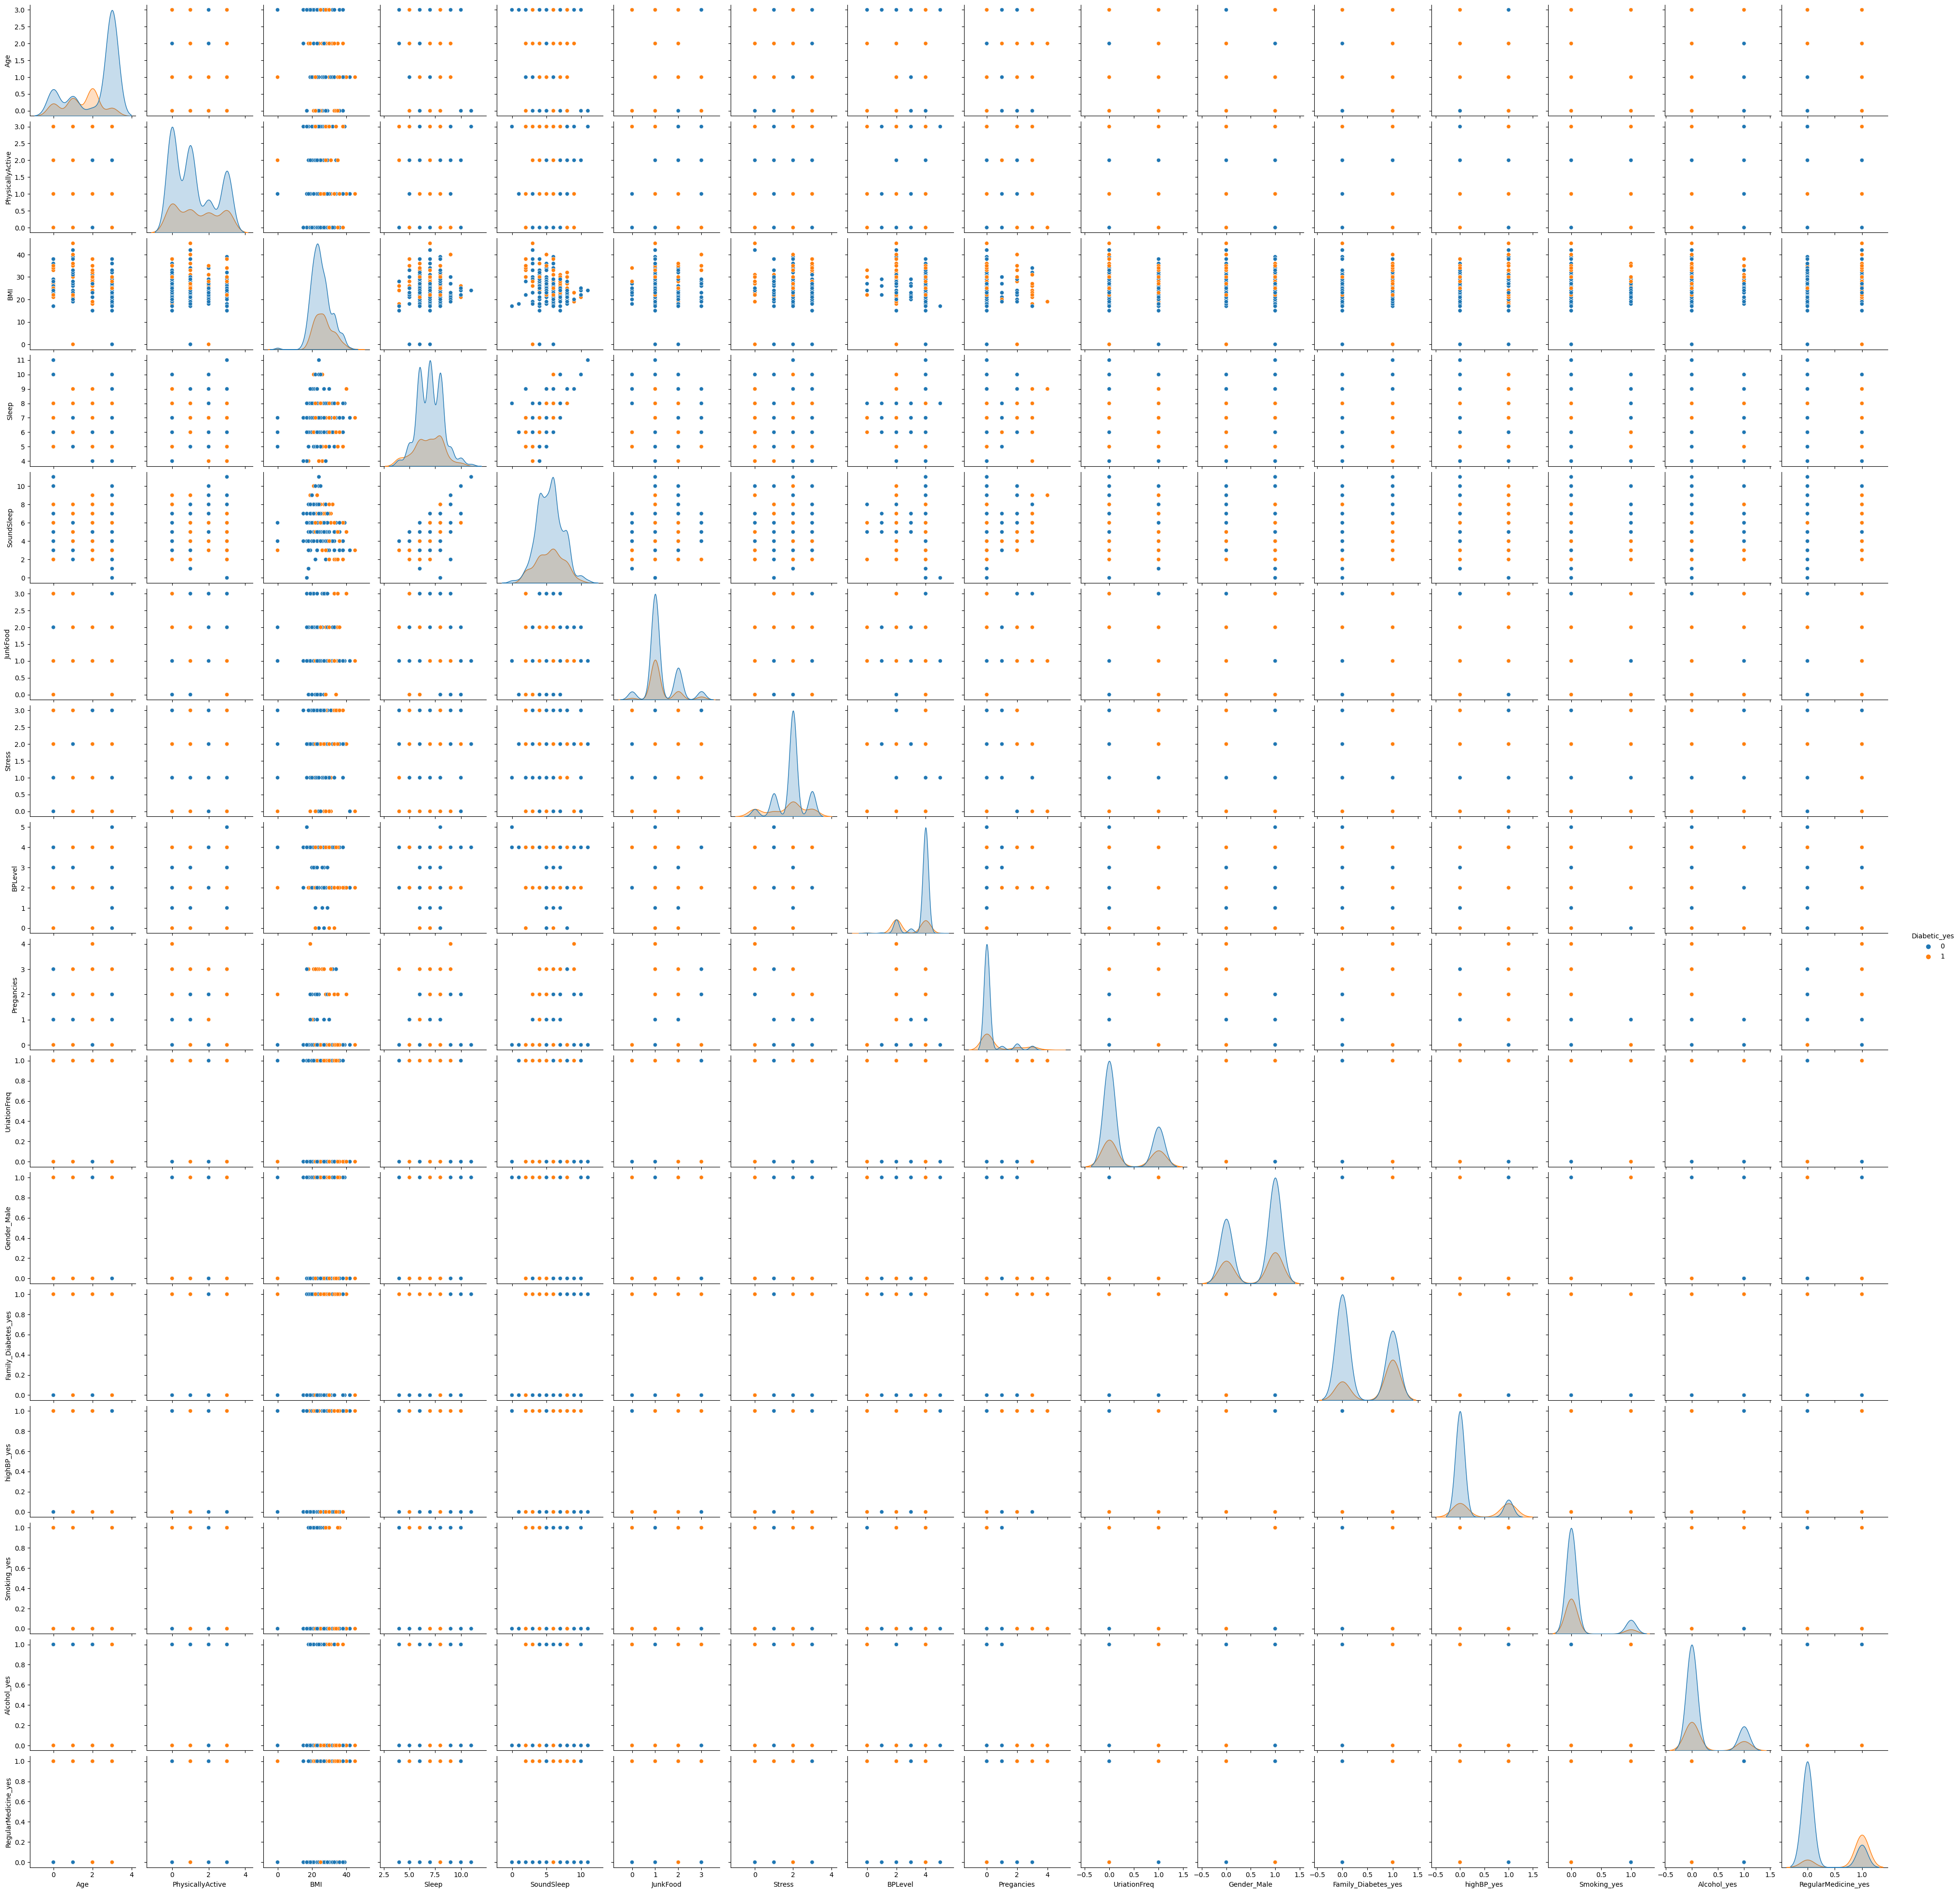

In [11]:
# pair plot
sns.pairplot(diabdata_new, hue = "Diabetic_yes")

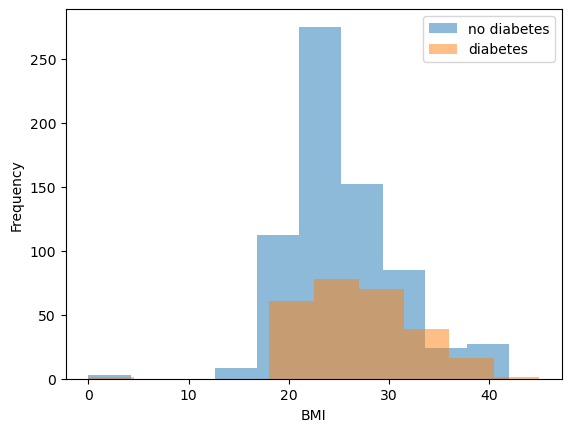

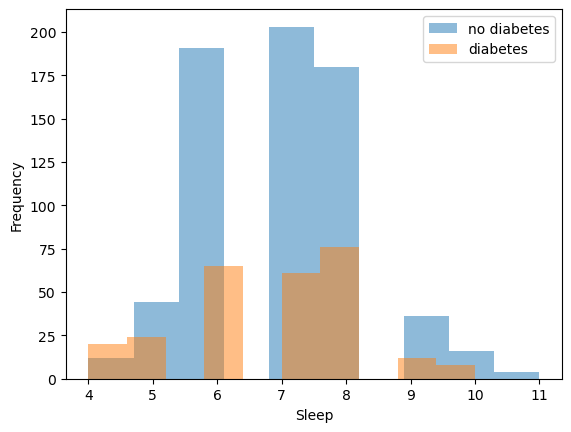

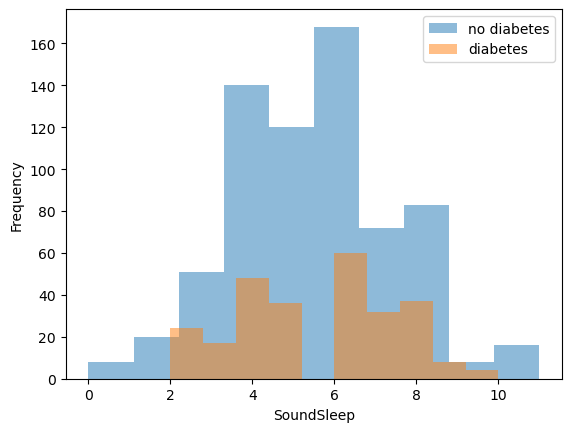

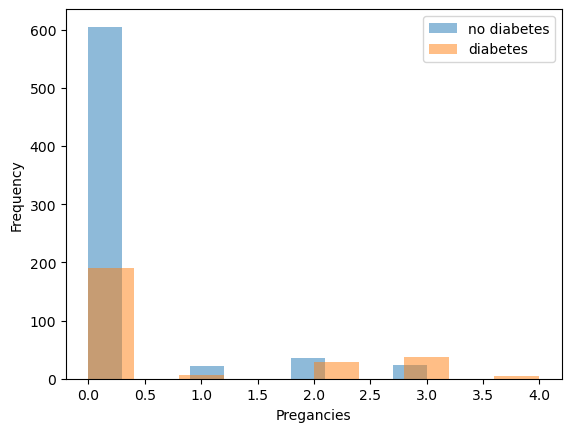

In [12]:
for col in ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']:
    plt.hist(diabdata_new[diabdata_new['Diabetic_yes'] ==  0][col], 10, alpha = 0.5, label = 'no diabetes')
    plt.hist(diabdata_new[diabdata_new['Diabetic_yes'] == 1][col], 10, alpha = 0.5, label = 'diabetes')
    plt.legend(loc = 'upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Diabetic_yes', ylabel='count'>

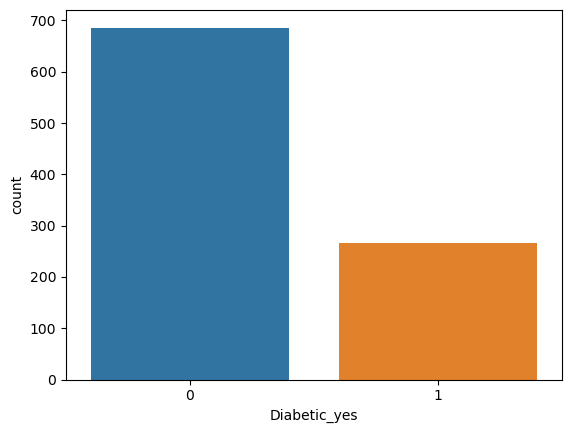

In [13]:
# Counting diabetes outcome
sns.countplot(x = 'Diabetic_yes', data = diabdata_new)

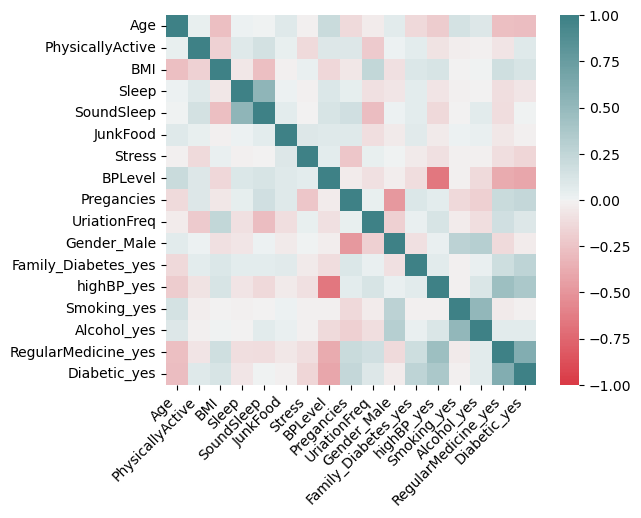

In [14]:
corr = diabdata_new.corr()
corr
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [15]:
# Dropping low correlation attributes
final_diabdata = diabdata_new.drop(['PhysicallyActive','Sleep','SoundSleep','JunkFood','UriationFreq','Gender_Male','Smoking_yes','Alcohol_yes', 'Pdiabetes'], axis = 1)
final_diabdata

,Age,BMI,Stress,BPLevel,Pregancies,Family_Diabetes_yes,highBP_yes,RegularMedicine_yes,Diabetic_yes
0,1.0,39.0,2.0,2.0,0.0,0.0,1.0,0.0,0
1,1.0,28.0,2.0,4.0,0.0,0.0,1.0,1.0,0
2,0.0,24.0,2.0,4.0,0.0,0.0,0.0,0.0,0
3,1.0,23.0,2.0,4.0,0.0,0.0,0.0,0.0,0
4,0.0,27.0,2.0,4.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
947,3.0,25.0,2.0,4.0,0.0,1.0,0.0,0.0,1
948,2.0,27.0,2.0,2.0,0.0,1.0,1.0,1.0,1
949,2.0,23.0,2.0,2.0,0.0,0.0,1.0,1.0,0
950,2.0,27.0,3.0,2.0,0.0,0.0,1.0,1.0,0


In [16]:
final_diabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  952 non-null    float64
 1   BMI                  952 non-null    float64
 2   Stress               952 non-null    float64
 3   BPLevel              952 non-null    float64
 4   Pregancies           952 non-null    float64
 5   Family_Diabetes_yes  952 non-null    float64
 6   highBP_yes           952 non-null    float64
 7   RegularMedicine_yes  952 non-null    float64
 8   Diabetic_yes         952 non-null    uint8  
dtypes: float64(8), uint8(1)
memory usage: 60.6 KB


In [17]:
# Naive Bayes Model
X = final_diabdata.drop("Diabetic_yes", axis = 1)
y = final_diabdata[["Diabetic_yes"]]

# split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

naive_model = GaussianNB()
naive_model.fit(X_train, y_train.values.ravel())
y_pred = naive_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8272251308900523
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       133
           1       0.75      0.66      0.70        58

    accuracy                           0.83       191
   macro avg       0.80      0.78      0.79       191
weighted avg       0.82      0.83      0.82       191

[[120  13]
 [ 20  38]]


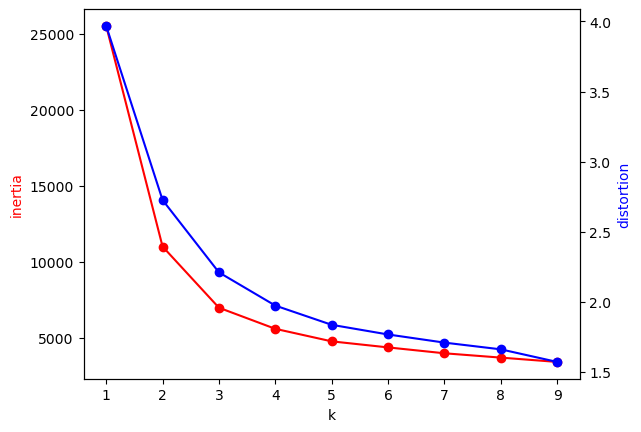

In [41]:
# finding optimal number k clusters via elbow method (k means)

distortions = [] # Sum of squared distances between samples and their closest cluster center
inertias = [] # Average of SSE between points and their assigned centroid
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)


# plot inertia and distortion
inertia = plt.subplot()
inertia.plot(K, inertias, marker='o', color='red')
inertia.set_xlabel('k')
inertia.set_ylabel('inertia',color='red')

distortion=inertia.twinx()
distortion.plot(K, distortions, color='blue', marker='o')
distortion.set_ylabel('distortion',color='blue')
plt.show()


In [36]:
# observe that distortion score line appears to become more linear at k = 3
# knn instant with n=3 neighbors 
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test) 

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9267015706806283
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       133
           1       0.96      0.79      0.87        58

    accuracy                           0.93       191
   macro avg       0.94      0.89      0.91       191
weighted avg       0.93      0.93      0.92       191

[[131   2]
 [ 12  46]]


/Users/aatishlobo/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/aatishlobo/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
XMLP = final_diabdata.drop('Diabetic_yes', axis=1)
yMLP = final_diabdata['Diabetic_yes']

#encode categorical variables and scale quantitative
preprocessor_MLP = ColumnTransformer(transformers = [
    ('num', StandardScaler(), yMLP)
])

XMLP_preproc = preprocessor_MLP.fit_transform(XMLP) #apply preprocessing

#train-test 80-20
X_trainMLP, X_testMLP, y_trainMLP, y_testMLP = train_test_split(XMLP_preproc, yMLP, test_size=0.2, random_state=12)
#using standard MLPClassifier activation and solver, as well as hidden layer sizes of 100 neurons for 2 layers
mlp = MLPClassifier(hidden_layer_sizes = (100,100), activation = 'relu', 
                    solver = 'adam', random_state = 12, max_iter=300)

mlp.fit(X_trainMLP, y_trainMLP)
y_predMLP = mlp.predict(X_testMLP)
accMLP = np.mean(y_predMLP == y_testMLP)
accMLP

0.7801047120418848

In [26]:
from sklearn.model_selection import GridSearchCV

activations = ['relu', 'logistic']
solvers = ['sgd', 'adam']
max_iterations = [1000,1100,1200]
hidden_layer_siz = [(5, 7), (7, 13), (13, 10), (100,100)]
learning_rates = 0.01 * np.arange(1, 3)

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations, activation = activations, solver = solvers)
# set model
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

# For Grid Search
grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X_trainMLP,y_trainMLP)

print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

Optimal Hyper-parameters :  {'activation': 'logistic', 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'adam'}
Optimal Accuracy :  0.8212762297901618
